In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Baca file Excel dari Google Drive
file_path = '/content/drive/MyDrive/DatasetDataMining/IP___Riwayat_Medical_01012016 s.d 19032024_handled_lowercase_range.xlsx'
df = pd.read_excel(file_path)


In [ ]:
# Cek jumlah data yang hilang (missing data) di setiap kolom
print(df.isnull().sum())


no                     0
diagnosa               0
institusi              0
area                   0
rumah                  0
tipe                   0
biaya_berobat          0
range_biaya_berobat    0
dtype: int64


In [ ]:
# prompt: tolong handle data mising yang ada di kolom fitur fitur berikut ini dengan mengisi kolom data mising:
# no                  0
# diagnosa            0
# institusi           0
# area                0
# rumah            1131
# tipe             2750
# biaya_berobat      25
# dtype: int64

# Mengisi data yang hilang di kolom 'rumah' dengan modus (nilai yang paling sering muncul)
df['rumah'].fillna(df['rumah'].mode()[0], inplace=True)

# Mengisi data yang hilang di kolom 'tipe' dengan modus (nilai yang paling sering muncul)
df['tipe'].fillna(df['tipe'].mode()[0], inplace=True)

# Mengisi data yang hilang di kolom 'biaya_berobat' dengan median (nilai tengah)
df['biaya_berobat'].fillna(df['biaya_berobat'].median(), inplace=True)

# Cek kembali jumlah data yang hilang setelah penanganan
print(df.isnull().sum())


no                     0
diagnosa               0
institusi              0
area                   0
rumah                  0
tipe                   0
biaya_berobat          0
range_biaya_berobat    0
dtype: int64


<ipython-input-4-41d3d8a28f36>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rumah'].fillna(df['rumah'].mode()[0], inplace=True)
<ipython-input-4-41d3d8a28f36>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [ ]:
# prompt: simpan dataset yang sudah terhandle, ke gdrive

# Simpan dataset yang sudah dihandle ke Google Drive
output_file_path = '/content/drive/MyDrive/DatasetDataMining/IP___Riwayat_Medical_01012016 s.d 19032024_handled.xlsx'
df.to_excel(output_file_path, index=False)

print(f"Dataset berhasil disimpan ke: {output_file_path}")


Dataset berhasil disimpan ke: /content/drive/MyDrive/DatasetDataMining/IP___Riwayat_Medical_01012016 s.d 19032024_handled.xlsx


In [ ]:
# prompt: tolong buat semua isi data menjadi lowercase dan buat agar isi kolom fitur biaya_berobat menjadi range 250.000, jadi contoh pertama 0-250.000 lalu kedua ada 250.000-500.000

# Convert all string columns to lowercase
for column in df.select_dtypes(['object']):
  df[column] = df[column].str.lower()

# Create a new column for the range of biaya_berobat
def categorize_biaya(biaya):
  if biaya <= 250000:
    return '0-250.000'
  elif biaya <= 500000:
    return '250.000-500.000'
  elif biaya <= 750000:
    return '500.000-750.000'
  elif biaya <= 1000000:
    return '750.000-1.000.000'
  else:
    return '>1.000.000'

df['range_biaya_berobat'] = df['biaya_berobat'].apply(categorize_biaya)

# Print the updated DataFrame
print(df.head())


# Simpan dataset yang sudah dihandle ke Google Drive
output_file_path = '/content/drive/MyDrive/DatasetDataMining/IP___Riwayat_Medical_01012016 s.d 19032024_handled_lowercase_range.xlsx'
df.to_excel(output_file_path, index=False)

print(f"Dataset berhasil disimpan ke: {output_file_path}")


   no         diagnosa     institusi     area                          rumah  \
0   1  hiperkolesterol   rumah sakit  bandung                   rs borromeus   
1   2   hiperlipidemia  laboratorium    garut  klinik bhakti ip kosaka garut   
2   3   hiperlipidemia    poliklinik    garut  klinik bhakti ip kosaka garut   
3   4          vertigo    poliklinik    garut  klinik bhakti ip kosaka garut   
4   5         check up  laboratorium    garut  klinik bhakti ip kosaka garut   

          tipe  biaya_berobat range_biaya_berobat  
0  dokter umum        1172500          >1.000.000  
1  dokter umum         454000     250.000-500.000  
2  dokter umum          59000           0-250.000  
3  dokter umum          80500           0-250.000  
4  dokter umum         586000     500.000-750.000  
Dataset berhasil disimpan ke: /content/drive/MyDrive/DatasetDataMining/IP___Riwayat_Medical_01012016 s.d 19032024_handled_lowercase_range.xlsx


In [ ]:
# prompt: simpan dataset yang sudah diubah, ke gdrive

# Simpan dataset yang sudah dihandle ke Google Drive
output_file_path = '/content/drive/MyDrive/DatasetDataMining/IP___Riwayat_Medical_01012016 s.d 19032024_handled_lowercase_range.xlsx'
df.to_excel(output_file_path, index=False)

print(f"Dataset berhasil disimpan ke: {output_file_path}")


Dataset berhasil disimpan ke: /content/drive/MyDrive/DatasetDataMining/IP___Riwayat_Medical_01012016 s.d 19032024_handled_lowercase_range.xlsx


In [ ]:
# prompt: dari dataset di atas lakukan tranformasi data (data diskretisasi) pada fitur dataset yang dibutuhkan

from sklearn.preprocessing import KBinsDiscretizer

# Pilih fitur yang akan didiskretisasi (contoh: biaya_berobat)
fitur_diskret = ['biaya_berobat']

# Tentukan jumlah bin (interval) yang diinginkan
n_bins = 5

# Buat objek KBinsDiscretizer
est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')

# Transformasikan data
df[fitur_diskret] = est.fit_transform(df[fitur_diskret])

# Print DataFrame yang telah didiskretisasi
print(df.head())

# Simpan dataset yang sudah didiskretisasi ke Google Drive
output_file_path = '/content/drive/MyDrive/DatasetDataMining/IP___Riwayat_Medical_01012016 s.d 19032024_handled_lowercase_range_discretized.xlsx'
df.to_excel(output_file_path, index=False)

print(f"Dataset berhasil disimpan ke: {output_file_path}")


   no         diagnosa     institusi     area                          rumah  \
0   1  hiperkolesterol   rumah sakit  bandung                   rs borromeus   
1   2   hiperlipidemia  laboratorium    garut  klinik bhakti ip kosaka garut   
2   3   hiperlipidemia    poliklinik    garut  klinik bhakti ip kosaka garut   
3   4          vertigo    poliklinik    garut  klinik bhakti ip kosaka garut   
4   5         check up  laboratorium    garut  klinik bhakti ip kosaka garut   

          tipe  biaya_berobat range_biaya_berobat  
0  dokter umum            0.0          >1.000.000  
1  dokter umum            0.0     250.000-500.000  
2  dokter umum            0.0           0-250.000  
3  dokter umum            0.0           0-250.000  
4  dokter umum            0.0     500.000-750.000  
Dataset berhasil disimpan ke: /content/drive/MyDrive/DatasetDataMining/IP___Riwayat_Medical_01012016 s.d 19032024_handled_lowercase_range_discretized.xlsx


In [ ]:
import pandas as pd

# Baca file Excel dari Google Drive
file_path = '/content/drive/MyDrive/DatasetDataMining/IP___Riwayat_Medical_01012016 s.d 19032024_handled_lowercase_range.xlsx'
df = pd.read_excel(file_path)
df.head()

no         diagnosa     institusi     area                          rumah  \
0   1  hiperkolesterol   rumah sakit  bandung                   rs borromeus   
1   2   hiperlipidemia  laboratorium    garut  klinik bhakti ip kosaka garut   
2   3   hiperlipidemia    poliklinik    garut  klinik bhakti ip kosaka garut   
3   4          vertigo    poliklinik    garut  klinik bhakti ip kosaka garut   
4   5         check up  laboratorium    garut  klinik bhakti ip kosaka garut   

          tipe  biaya_berobat range_biaya_berobat  
0  dokter umum        1172500          >1.000.000  
1  dokter umum         454000     250.000-500.000  
2  dokter umum          59000           0-250.000  
3  dokter umum          80500           0-250.000  
4  dokter umum         586000     500.000-750.000

In [ ]:
df.head(10)

no         diagnosa     institusi     area                          rumah  \
0   1  hiperkolesterol   rumah sakit  bandung                   rs borromeus   
1   2   hiperlipidemia  laboratorium    garut  klinik bhakti ip kosaka garut   
2   3   hiperlipidemia    poliklinik    garut  klinik bhakti ip kosaka garut   
3   4          vertigo    poliklinik    garut  klinik bhakti ip kosaka garut   
4   5         check up  laboratorium    garut  klinik bhakti ip kosaka garut   
5   6          vertigo    poliklinik    garut  klinik bhakti ip kosaka garut   
6   7      pemeriksaan   rumah sakit  bandung                   rs borromeus   
7   8           syaraf   rumah sakit  bandung                   rs borromeus   
8   9          jantung   rumah sakit  bandung                   rs borromeus   
9  10    konsul dokter   rumah sakit  bandung                   rs borromeus   

                          tipe  biaya_berobat range_biaya_berobat  
0                  dokter umum        1172500          >1.000.000  
1                  dokter umum         454000     250.000-500.000  
2                  dokter umum          59000           0-250.000  
3                  dokter umum          80500           0-250.000  
4                  dokter umum         586000     500.000-750.000  
5                  dokter umum         137860           0-250.000  
6                  dokter umum         546900     500.000-750.000  
7  spesialis saraf (neurologi)        1471700          >1.000.000  
8     spesialis penyakit dalam        2368800          >1.000.000  
9                  dokter umum        3217300          >1.000.000

In [ ]:
df.tail()

no                               diagnosa     institusi     area  \
4995  4996                     ranap 15-18jan2022   rumah sakit  bandung   
4996  4997                                  demam  laboratorium  bandung   
4997  4998                         cek lab- typus  laboratorium  bandung   
4998  4999                  cek darah setelah dbd  laboratorium  bandung   
4999  5000  hipertensi - 019/kes/peg/adk/kmj/2022    poliklinik  bandung   

                              rumah         tipe  biaya_berobat  \
4995             rs santo barromeus  dokter umum        4821801   
4996  klinik bhakti ip kosaka garut  dokter umum         131000   
4997  klinik bhakti ip kosaka garut  dokter umum         401000   
4998  klinik bhakti ip kosaka garut  dokter umum         131000   
4999                           kbip  dokter umum         150610   

     range_biaya_berobat  
4995          >1.000.000  
4996           0-250.000  
4997     250.000-500.000  
4998           0-250.000  
4999           0-250.000

In [ ]:
df.dtypes

no                      int64
diagnosa               object
institusi              object
area                   object
rumah                  object
tipe                   object
biaya_berobat           int64
range_biaya_berobat    object
dtype: object

UNIVARIATE ANALYSIS

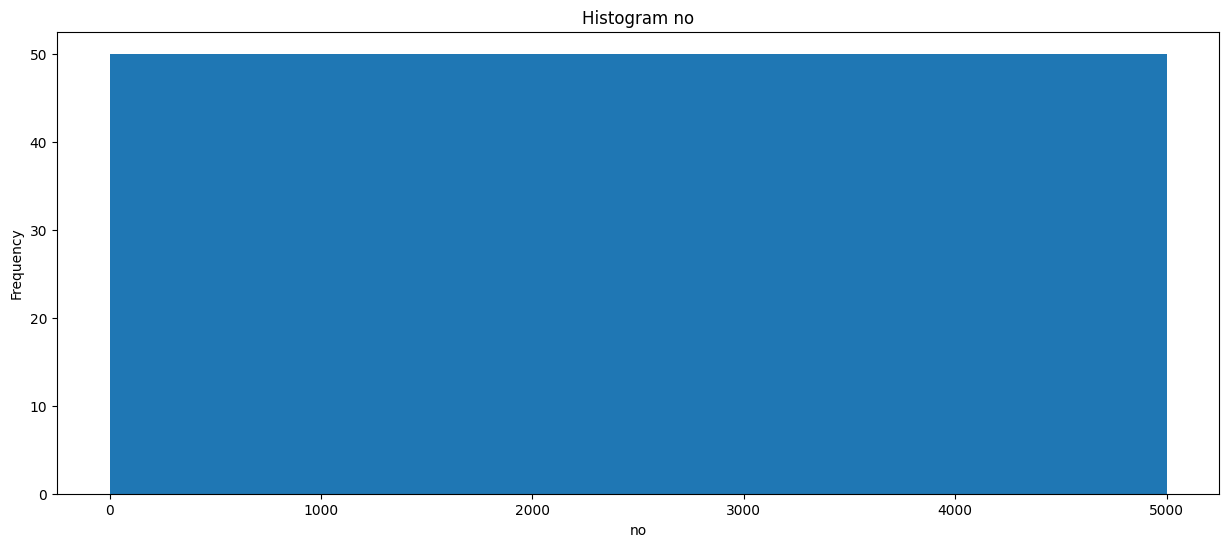

In [ ]:
import matplotlib.pyplot as plt


col = "no"

plt.figure(figsize=(15, 6))
plt.hist(df[col], bins=100)
plt.title(f"Histogram {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show()


Analisis: Dari histogram tersebut nomor memiliki jumlah yang sama pada setiap data

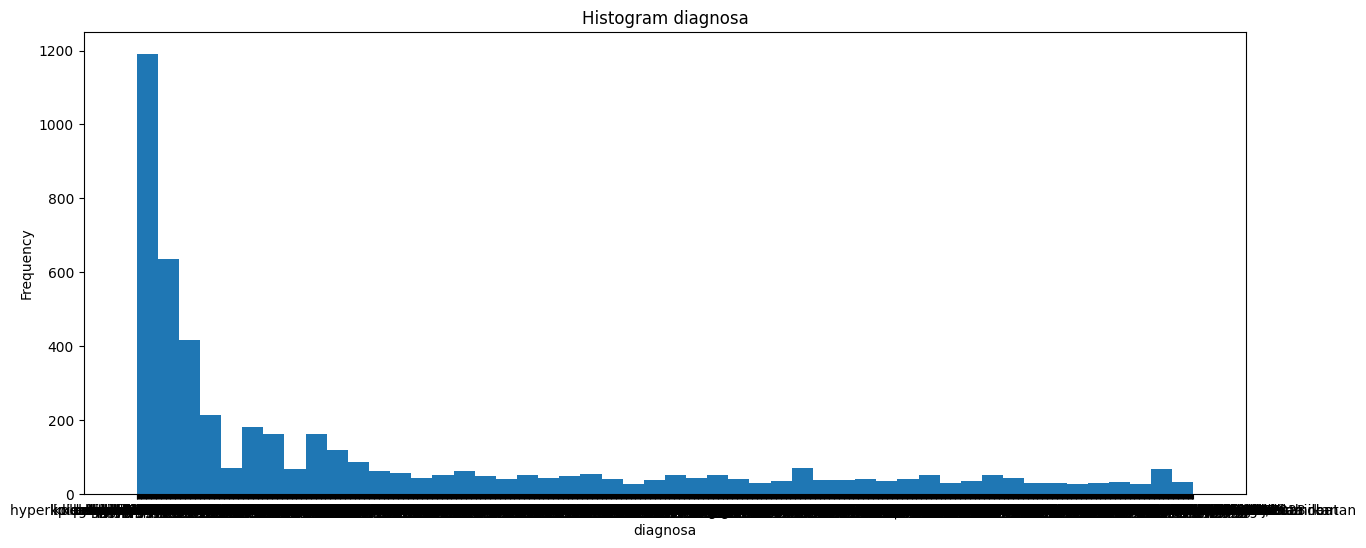

In [ ]:
col = "diagnosa"

plt.figure(figsize=(15, 6))
plt.hist(df[col], bins=50)
plt.title(f"Histogram {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show()


Analisis: Dari histogram tersebut terlihat ada satu diagnosa yang memiliki jumlah paling banyak hampir mencapai angka 1200

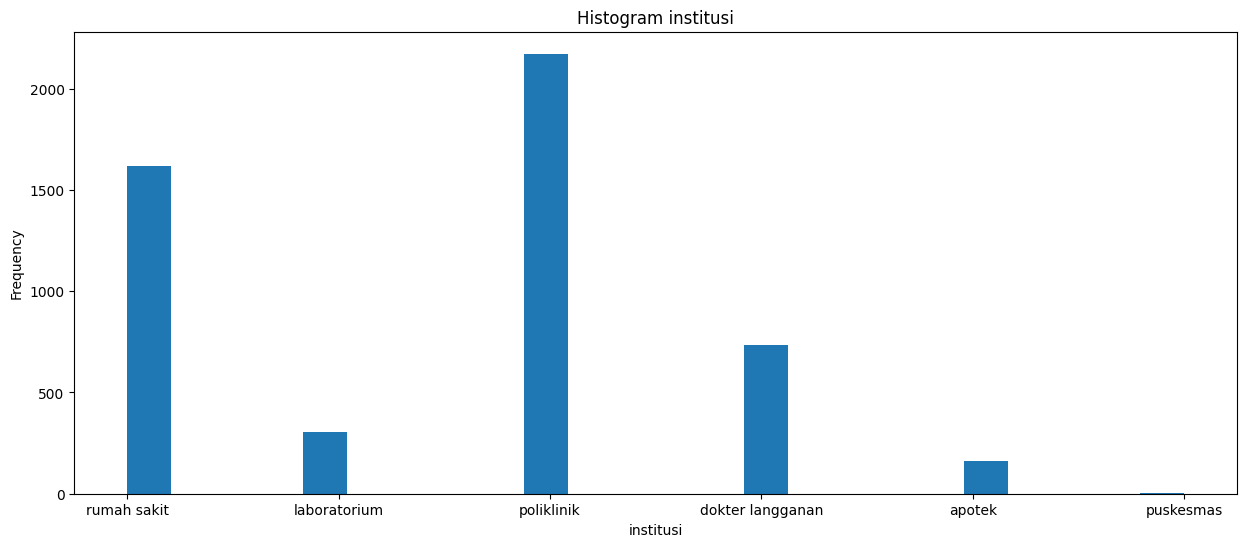

In [ ]:
col = "institusi"

plt.figure(figsize=(15, 6))
plt.hist(df[col], bins=24)
plt.title(f"Histogram {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show()

Analisis: Terlihat poliklinik menempati posisi teratas dengan lebih dari 2000 orang, sedangkan diposisi ke dua ada rumah sakit dengan lebih dari 1500 orang

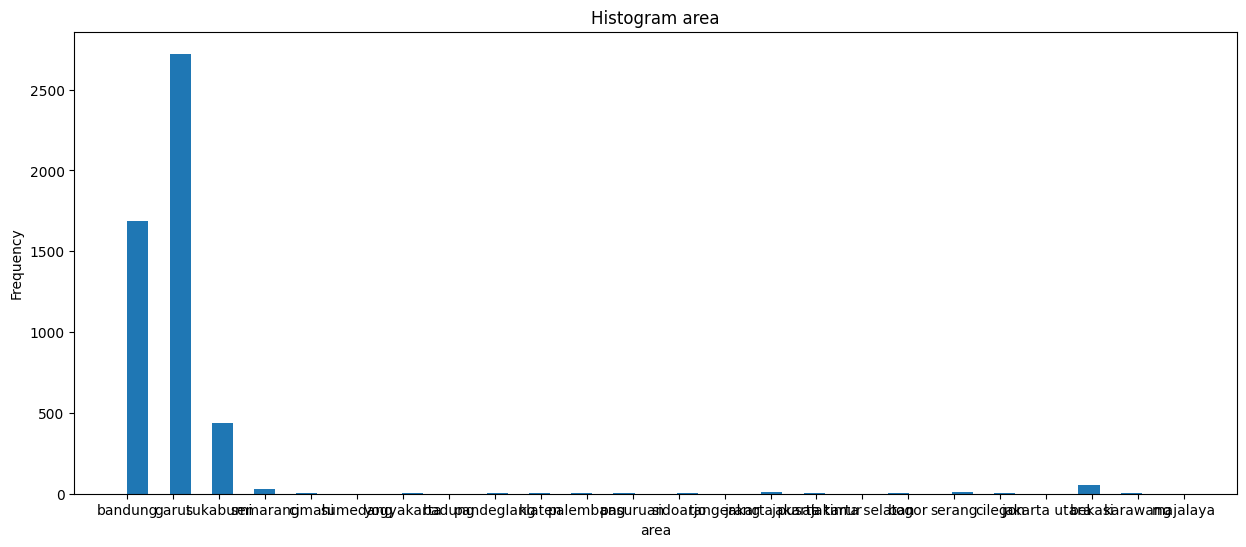

In [ ]:
col = "area"

plt.figure(figsize=(15, 6))
plt.hist(df[col], bins=50)
plt.title(f"Histogram {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show()

Analisis: Dari hasil diatas Garut merupakan lokasi asal orang berobat terbanyak dengan lebih dari 2500 orang, diikuti oleh Bandung dan Sukabumi

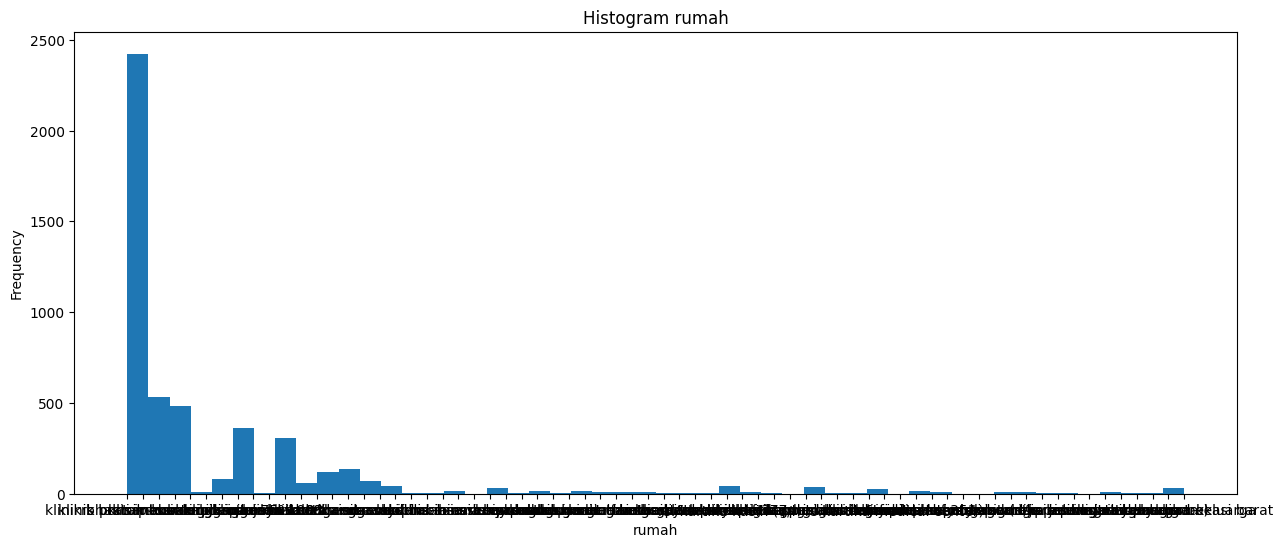

In [ ]:
col = "rumah"

plt.figure(figsize=(15, 6))
plt.hist(df[col], bins=50)
plt.title(f"Histogram {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show()

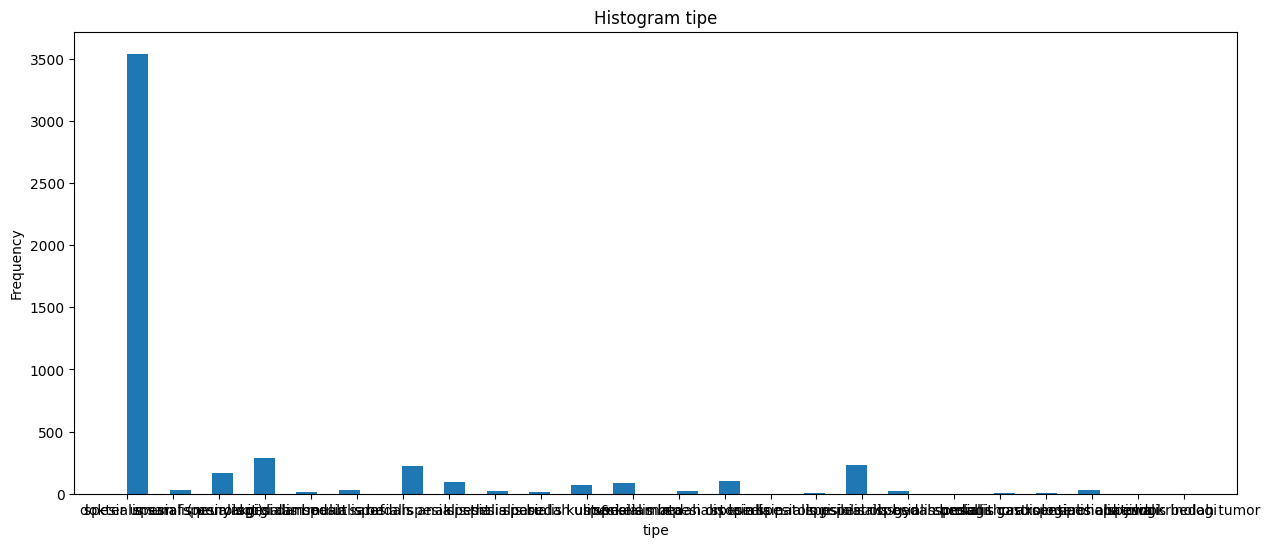

In [18]:
col = "tipe"

plt.figure(figsize=(15, 6))
plt.hist(df[col], bins=50)
plt.title(f"Histogram {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show()

Analisis: Dari histogram tersebut terlihat bahwa Dokter Umum merupakan yang paling sering dikunjungi

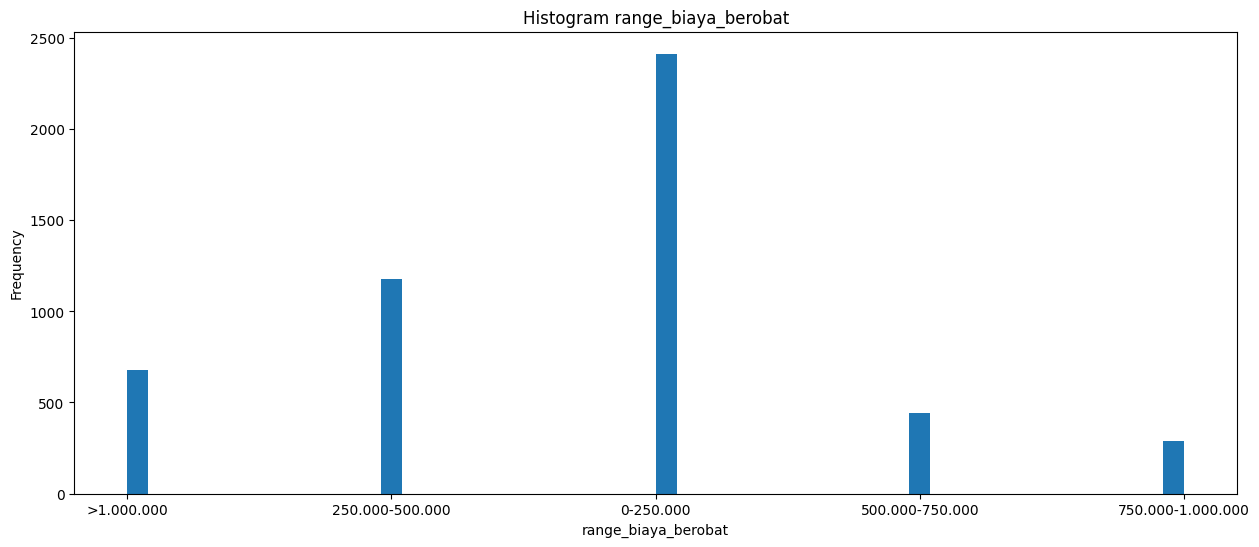

In [19]:
col = "range_biaya_berobat"

plt.figure(figsize=(15, 6))
plt.hist(df[col], bins=50)
plt.title(f"Histogram {col}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show()

Analisis: Terlihat jika range biaya berobat yang paling banyak yaitu 0-250.000

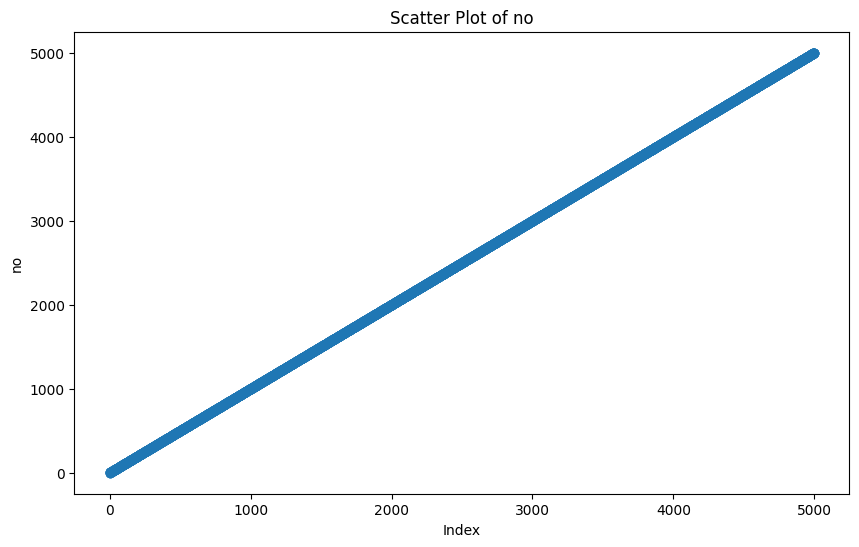

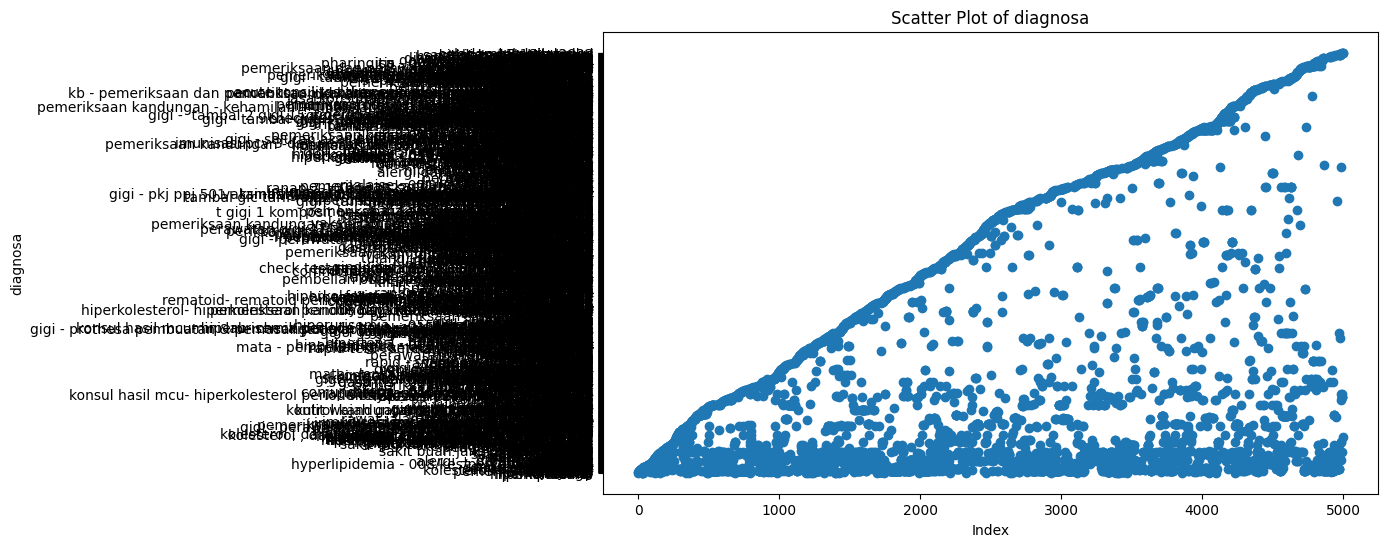

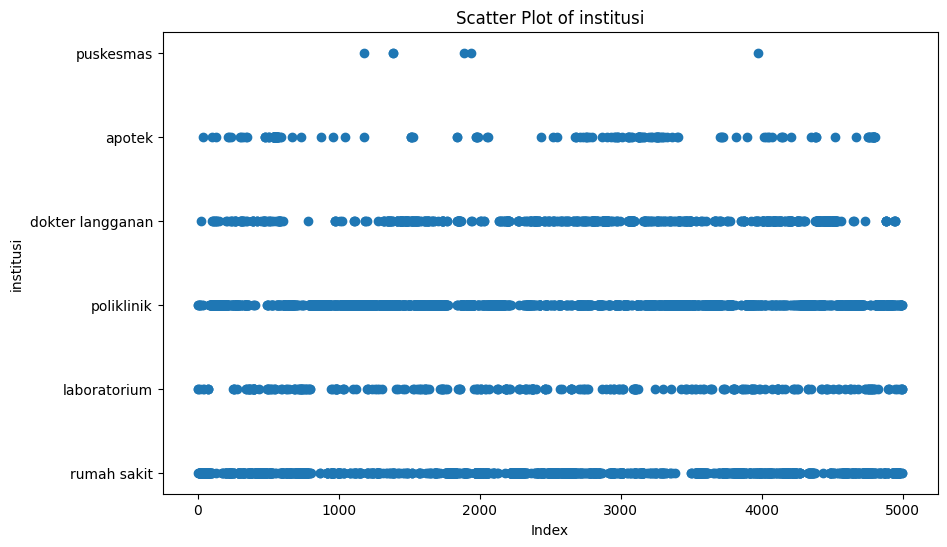

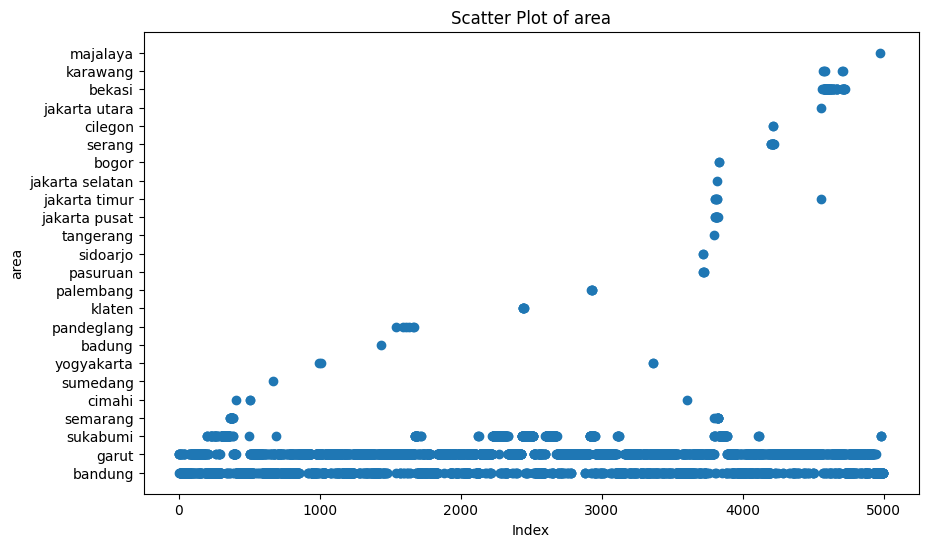

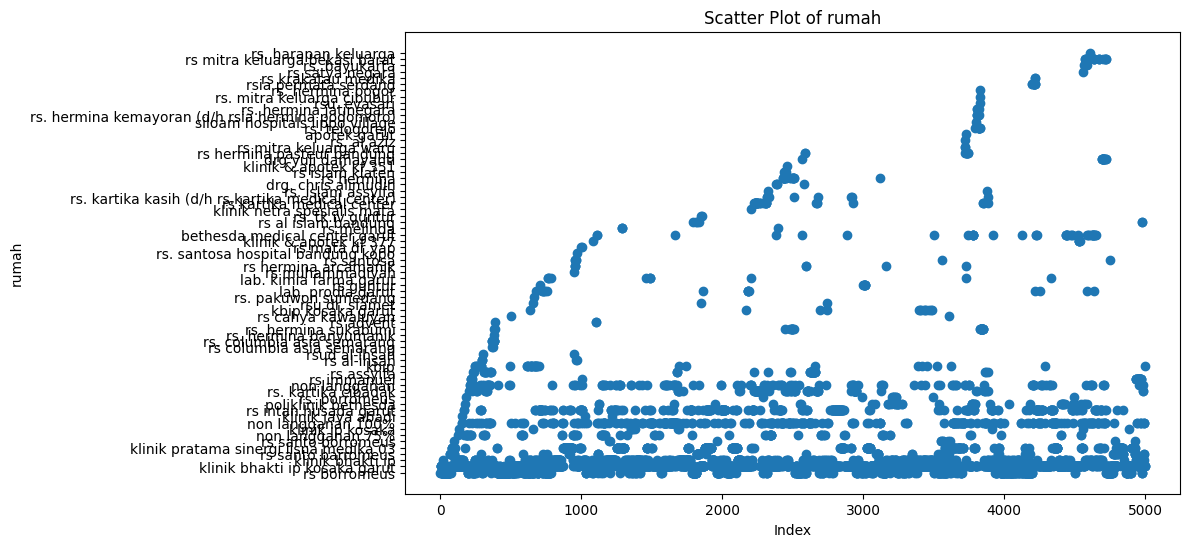

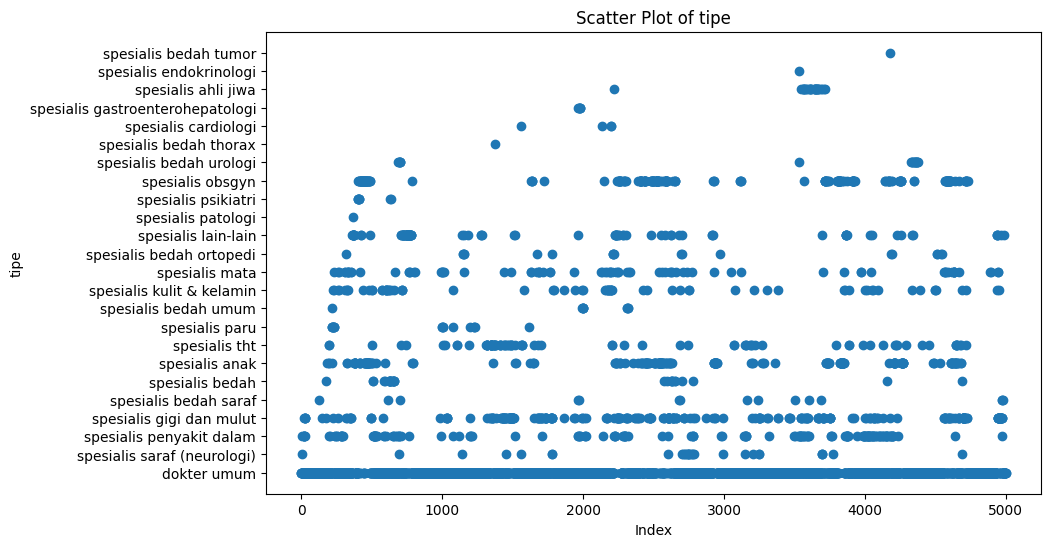

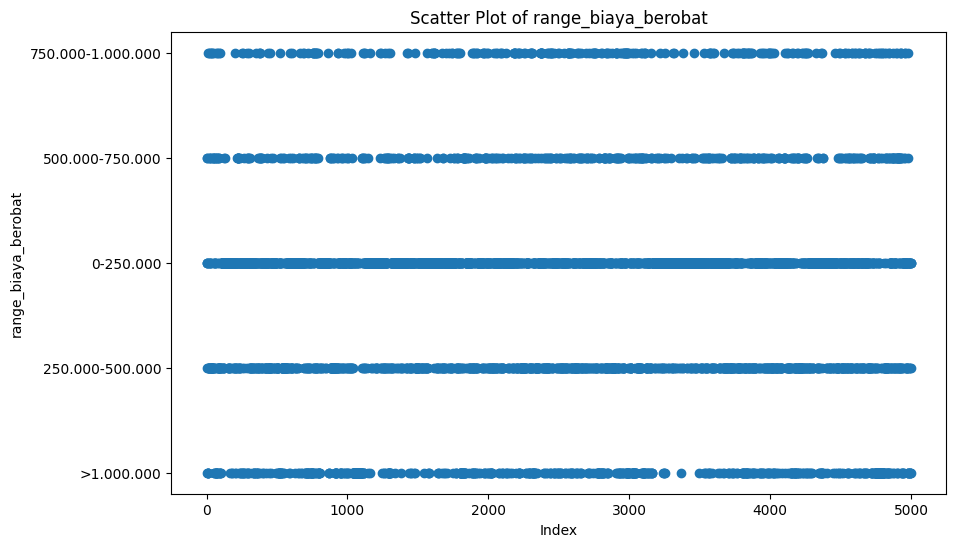

In [20]:
import matplotlib.pyplot as plt

# Daftar kolom yang ingin ditampilkan
kolom_pilihan = ["no", "diagnosa", "institusi", "area", "rumah", "tipe", "range_biaya_berobat"]

for kolom in kolom_pilihan:
  plt.figure(figsize=(10, 6))
  plt.scatter(df.index, df[kolom])
  plt.title(f"Scatter Plot of {kolom}")
  plt.xlabel("Index")
  plt.ylabel(kolom)
  plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder

# Mengasumsikan dataset adalah df dan kolom 'diagnosa' adalah kategorik
dataolahencoding = df.copy() # Membuat salinan dataset untuk mencegah modifikasi dataset asli

# Label encoding untuk kolom 'diagnosa'
encoder = LabelEncoder()
dataolahencoding['diagnosa_encod'] = encoder.fit_transform(dataolahencoding['diagnosa'])
dataolahencoding['institusi_encod'] = encoder.fit_transform(dataolahencoding['institusi'])
dataolahencoding['area_encod'] = encoder.fit_transform(dataolahencoding['area'])
dataolahencoding['rumah_encod'] = encoder.fit_transform(dataolahencoding['rumah'])
dataolahencoding['tipe_encod'] = encoder.fit_transform(dataolahencoding['tipe'])
dataolahencoding['biaya_berobat_encod'] = encoder.fit_transform(dataolahencoding['biaya_berobat'])


dataolahencoding.head()

no         diagnosa     institusi     area                          rumah  \
0   1  hiperkolesterol   rumah sakit  bandung                   rs borromeus   
1   2   hiperlipidemia  laboratorium    garut  klinik bhakti ip kosaka garut   
2   3   hiperlipidemia    poliklinik    garut  klinik bhakti ip kosaka garut   
3   4          vertigo    poliklinik    garut  klinik bhakti ip kosaka garut   
4   5         check up  laboratorium    garut  klinik bhakti ip kosaka garut   

          tipe  biaya_berobat range_biaya_berobat  diagnosa_encod  \
0  dokter umum        1172500          >1.000.000             404   
1  dokter umum         454000     250.000-500.000             409   
2  dokter umum          59000           0-250.000             409   
3  dokter umum          80500           0-250.000            1270   
4  dokter umum         586000     500.000-750.000             119   

   institusi_encod  area_encod  rumah_encod  tipe_encod  biaya_berobat_encod  
0                5           1           24           0                 2724  
1                2           6            9           0                 1890  
2                3           6            9           0                   51  
3                3           6            9           0                  137  
4                2           6            9           0                 2181

In [22]:
dataolahencoding = dataolahencoding.drop(['diagnosa', 'institusi', 'area', 'rumah', 'tipe', 'range_biaya_berobat'], axis=1)
dataolahencoding.head()


no  biaya_berobat  diagnosa_encod  institusi_encod  area_encod  \
0   1        1172500             404                5           1   
1   2         454000             409                2           6   
2   3          59000             409                3           6   
3   4          80500            1270                3           6   
4   5         586000             119                2           6   

   rumah_encod  tipe_encod  biaya_berobat_encod  
0           24           0                 2724  
1            9           0                 1890  
2            9           0                   51  
3            9           0                  137  
4            9           0                 2181

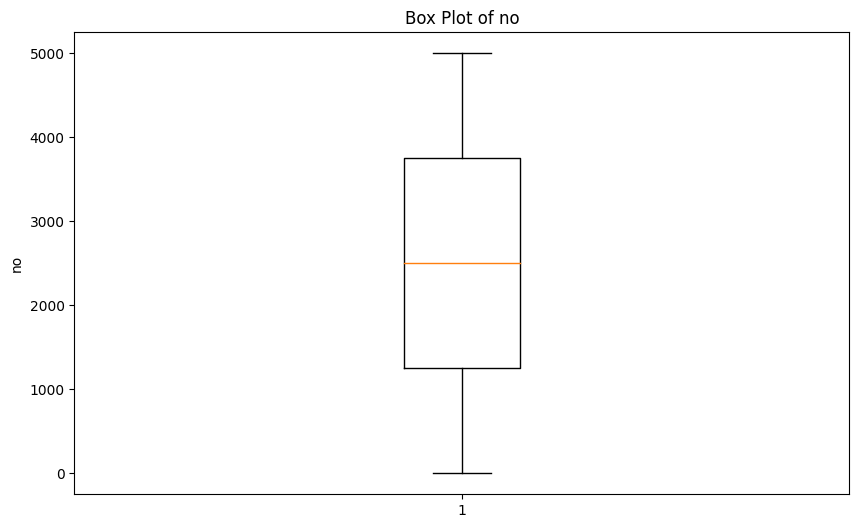

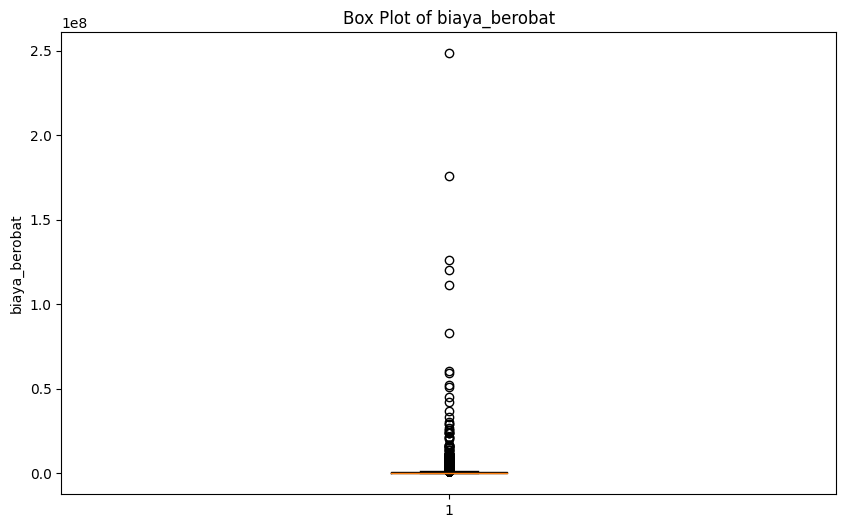

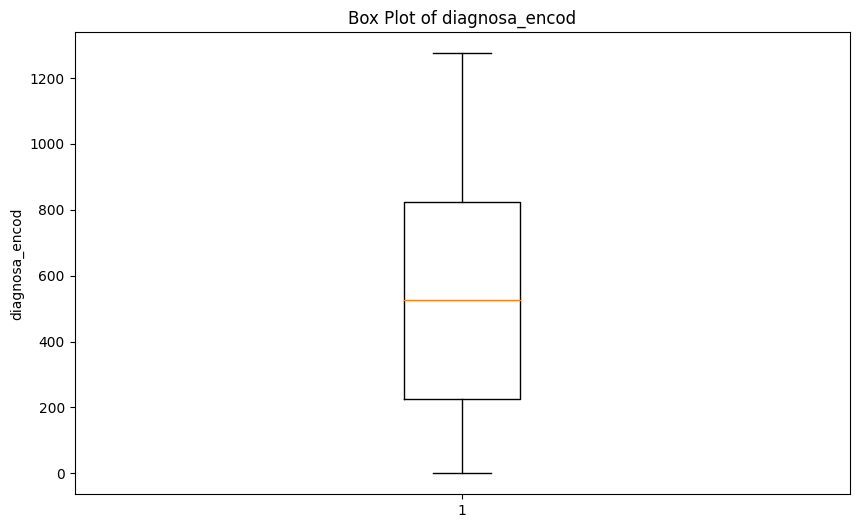

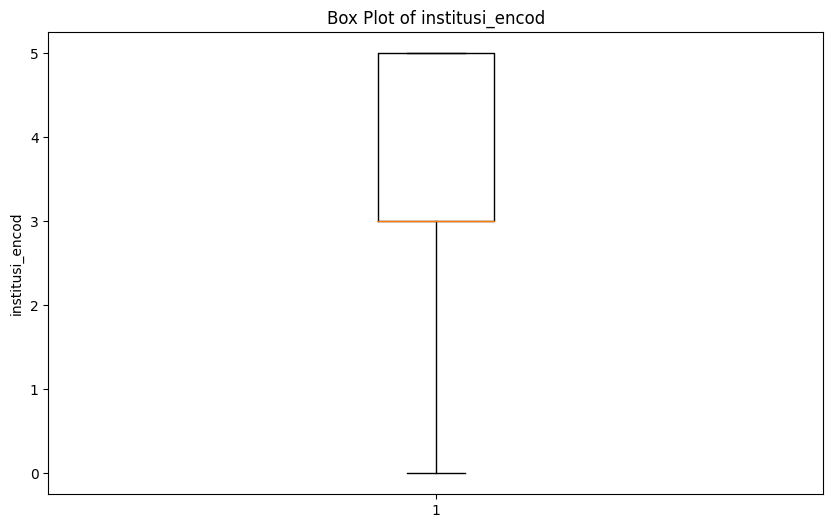

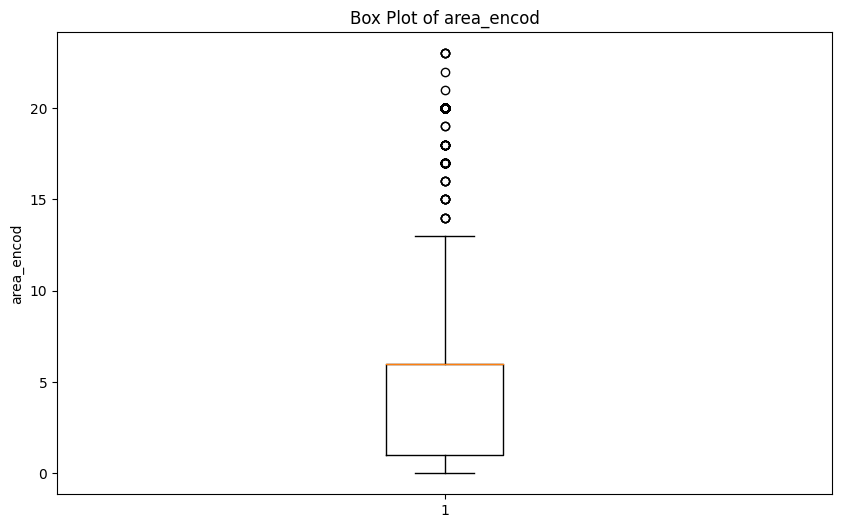

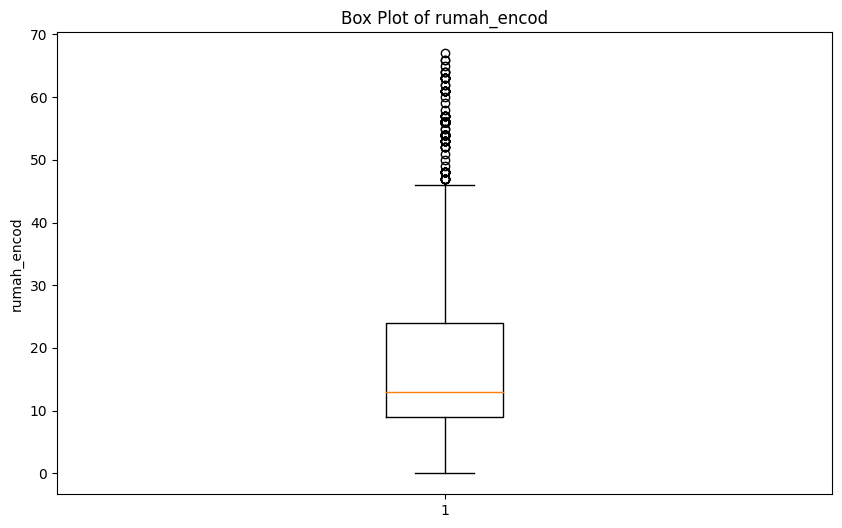

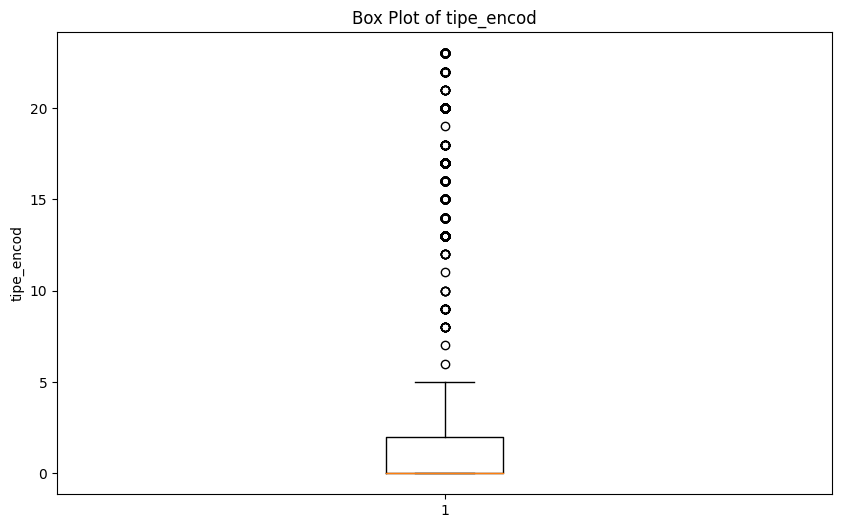

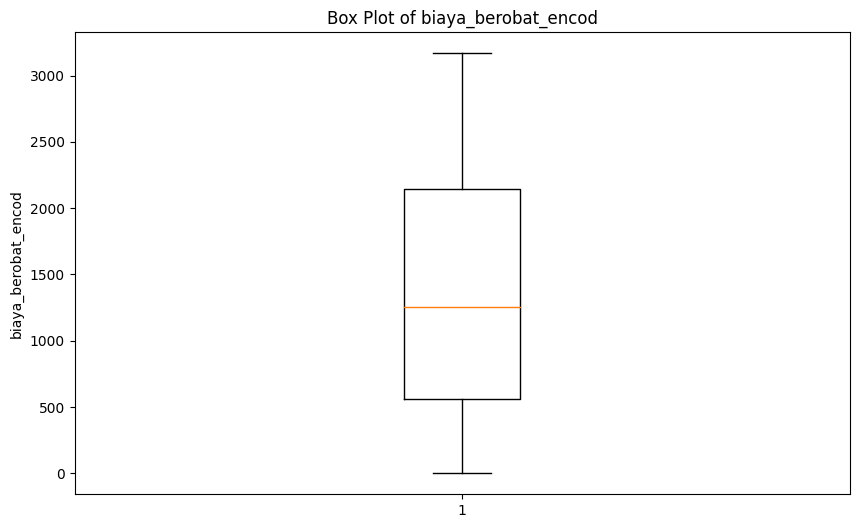

In [23]:
# Daftar kolom yang ingin ditampilkan
kolom_pilihan = ["no", "diagnosa", "institusi", "area", "rumah", "tipe", "range_biaya_berobat"]

for column in dataolahencoding.columns:
  plt.figure(figsize=(10, 6))
  plt.boxplot(dataolahencoding[column])
  plt.title(f"Box Plot of {column}")
  plt.ylabel(column)
  plt.show()

In [24]:
import numpy as np

def find_outliers_iqr(data):
  Q1 = np.percentile(data, 25)
  Q3 = np.percentile(data, 75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = [x for x in data if x < lower_bound or x > upper_bound]
  return outliers

for column in dataolahencoding.columns:
  outliers = find_outliers_iqr(dataolahencoding[column])
  if outliers:
    print(f"Kolom '{column}' memiliki outlier:")
    print(outliers)
    print()


Kolom 'biaya_berobat' memiliki outlier:
[1471700, 2368800, 3217300, 1335200, 1384696, 1458022, 1369582, 1942087, 1762200, 2319548, 1667122, 1339833, 2370718, 1508790, 1267913, 2200981, 1650700, 1737500, 9374800, 7056185, 1379627, 2829860, 11390731, 8469873, 1552673, 2120000, 1920000, 1800000, 12092611, 1520000, 4896719, 1453164, 5310347, 1823000, 1501000, 1225750, 1800000, 2000000, 248391800, 1320050, 1800000, 1442133, 1792167, 1950000, 23878600, 11307500, 1800000, 2400300, 2356600, 2355700, 1848400, 1848400, 1773400, 2356700, 2000000, 1820900, 3039500, 1937400, 1589000, 1641800, 1537869, 3625000, 8109200, 3497000, 15564300, 5914000, 1789200, 26757000, 23723000, 4499400, 2007000, 14020000, 1938204, 2178486, 120013094, 2194030, 2224513, 1800000, 1393605, 1343855, 1343855, 1409205, 9629469, 1208206, 1231283, 5000000, 6852000, 1507000, 2000000, 1800000, 2000000, 3054977, 4821775, 1547000, 6090000, 5676000, 15138025, 175840927, 3772087, 9722058, 2538815, 6781606, 1309355, 1319700, 1982250,

MULTIVARIATE ANALYSIS

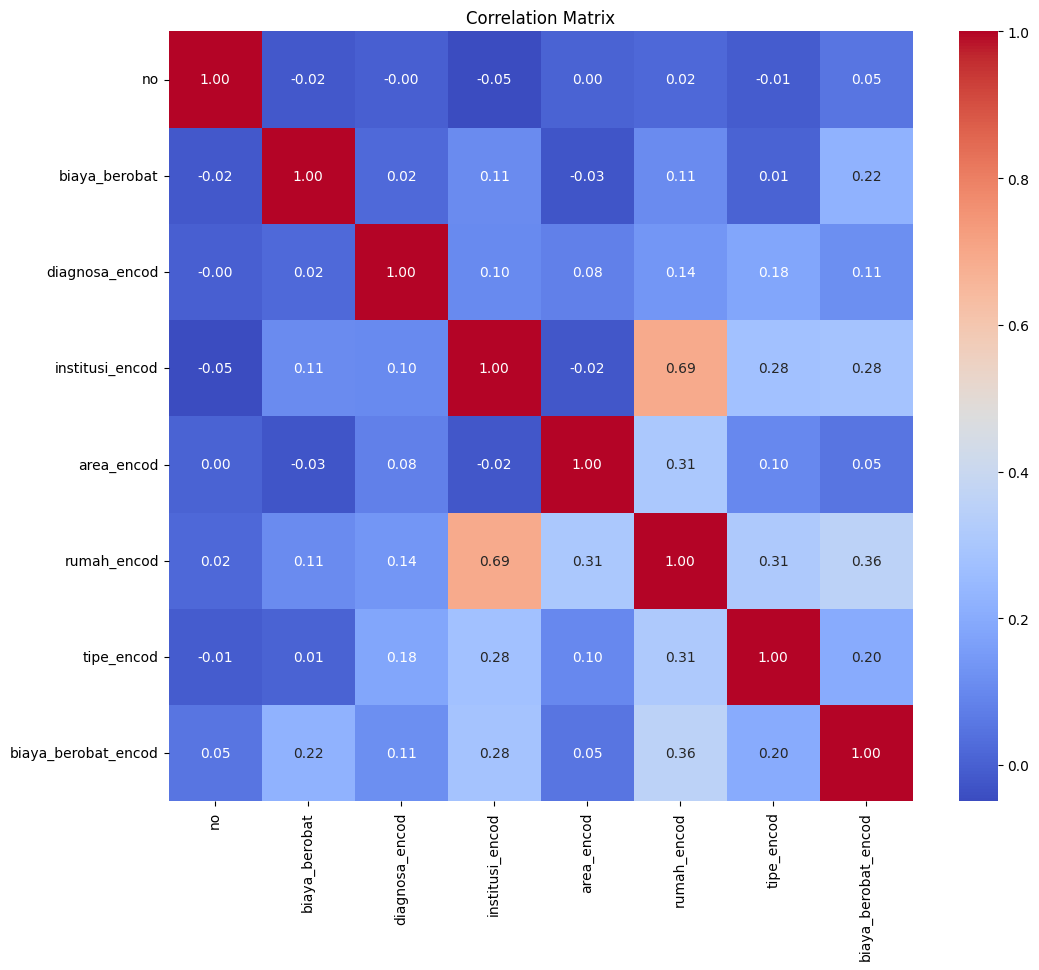

In [25]:
import seaborn as sns

correlation_matrix = dataolahencoding.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


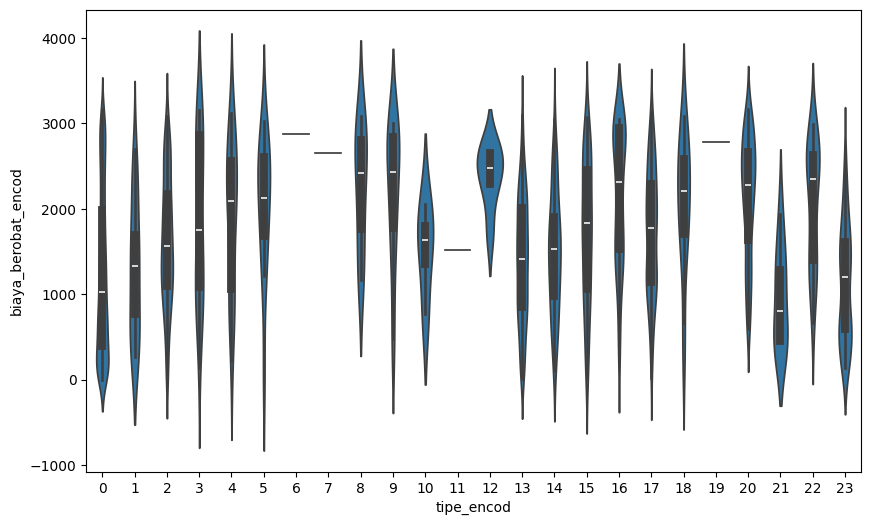

In [26]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='tipe_encod', y='biaya_berobat_encod', data=dataolahencoding)
plt.show()

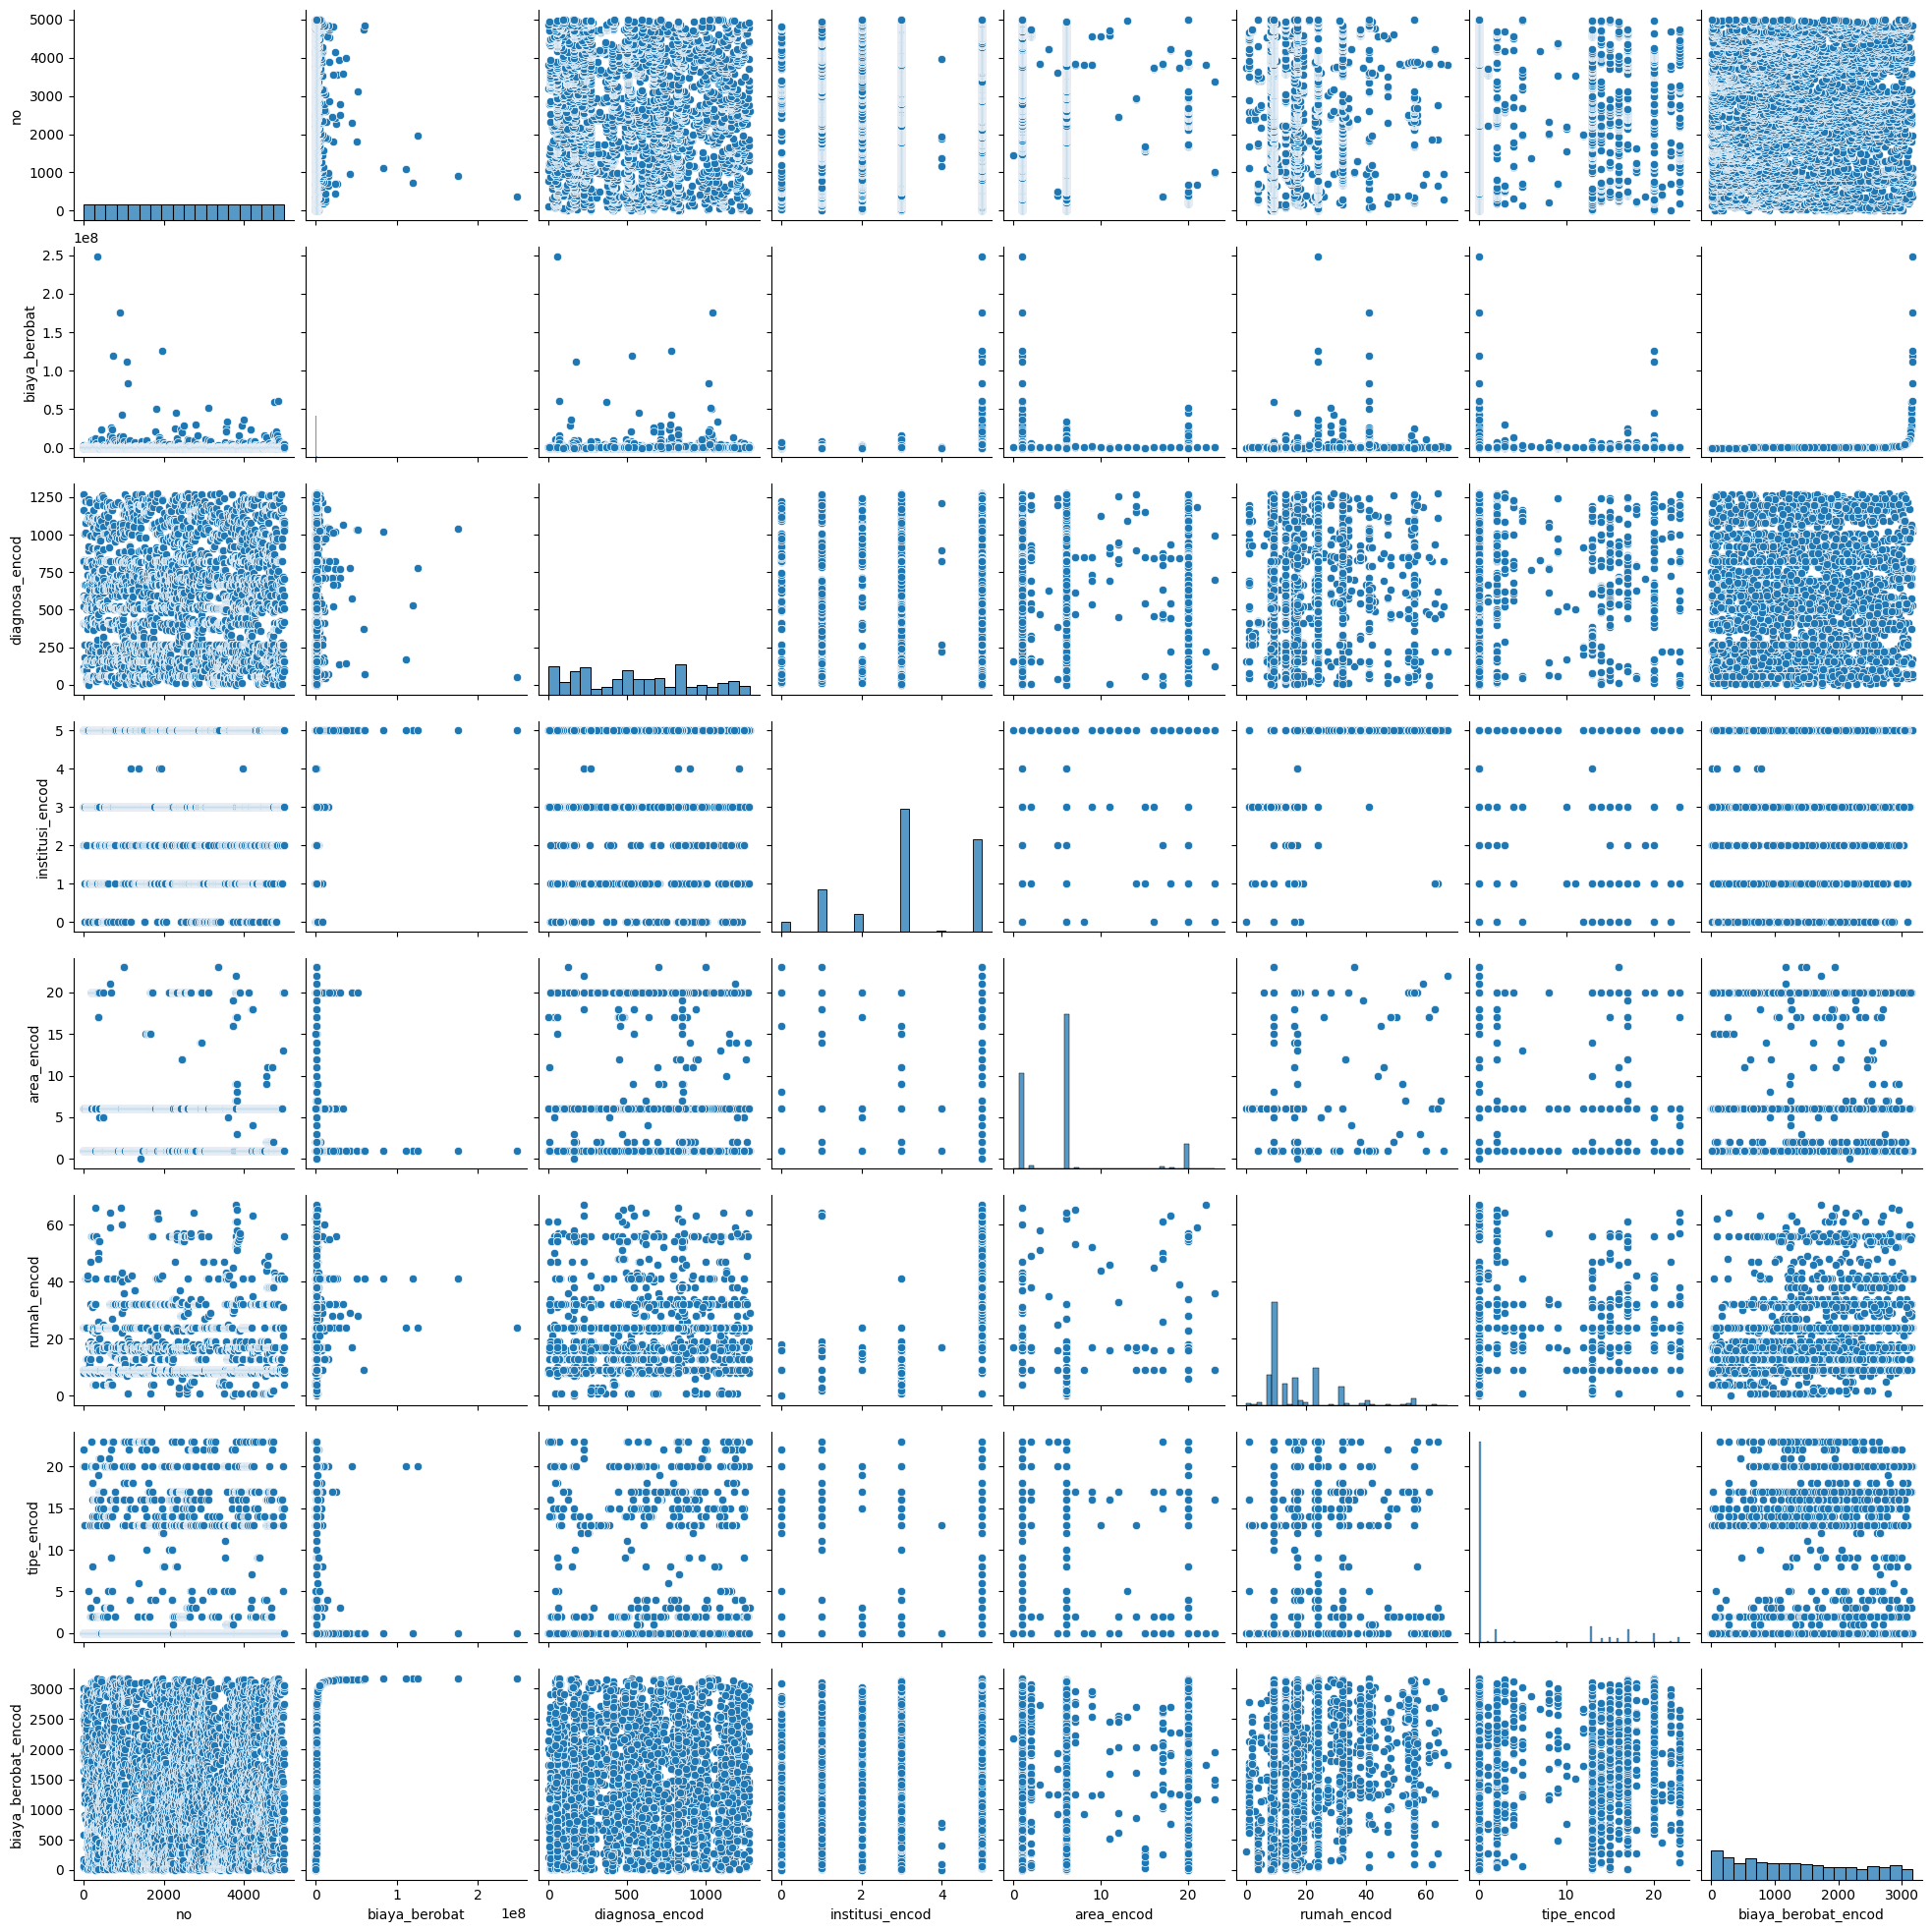

In [27]:
sns.pairplot(dataolahencoding)
plt.show()


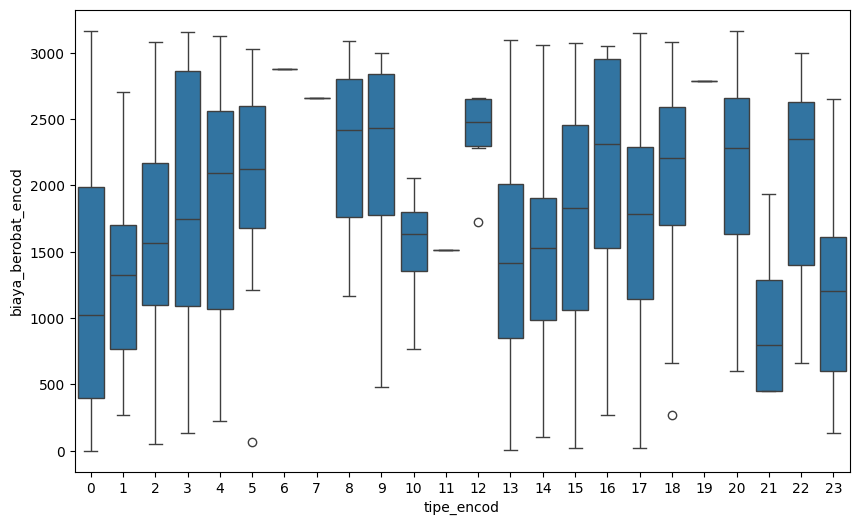

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='tipe_encod', y='biaya_berobat_encod', data=dataolahencoding)
plt.show()

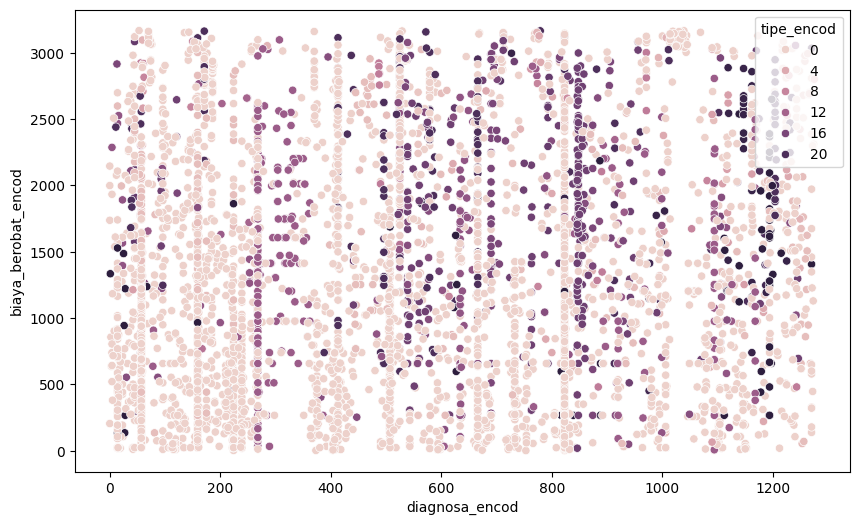

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='diagnosa_encod', y='biaya_berobat_encod', hue='tipe_encod', data=dataolahencoding)
plt.show()

In [51]:
dataolahencoding

no  biaya_berobat  diagnosa_encod  institusi_encod  area_encod  \
0        1        1172500             404                5           1   
1        2         454000             409                2           6   
2        3          59000             409                3           6   
3        4          80500            1270                3           6   
4        5         586000             119                2           6   
...    ...            ...             ...              ...         ...   
4995  4996        4821801            1025                5           1   
4996  4997         131000             159                2           1   
4997  4998         401000             104                2           1   
4998  4999         131000              90                2           1   
4999  5000         150610             417                3           1   

      rumah_encod  tipe_encod  biaya_berobat_encod  
0              24           0                 2724  
1               9           0                 1890  
2               9           0                   51  
3               9           0                  137  
4               9           0                 2181  
...           ...         ...                  ...  
4995           41           0                 3050  
4996            9           0                  519  
4997            9           0                 1753  
4998            9           0                  519  
4999            4           0                  660  

[5000 rows x 8 columns]

In [52]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

      principal component 1  principal component 2
0              2.466492e+05           -2416.623685
1             -4.718508e+05           -2465.327885
2             -8.668509e+05           -2571.227140
3             -8.453509e+05           -2564.365774
4             -3.398508e+05           -2445.548489
...                     ...                    ...
4995           3.895950e+06            2597.769432
4996          -7.948509e+05            2441.357471
4997          -5.248508e+05            2514.042351
4998          -7.948509e+05            2443.285454
4999          -7.752409e+05            2452.779730

[5000 rows x 2 columns]


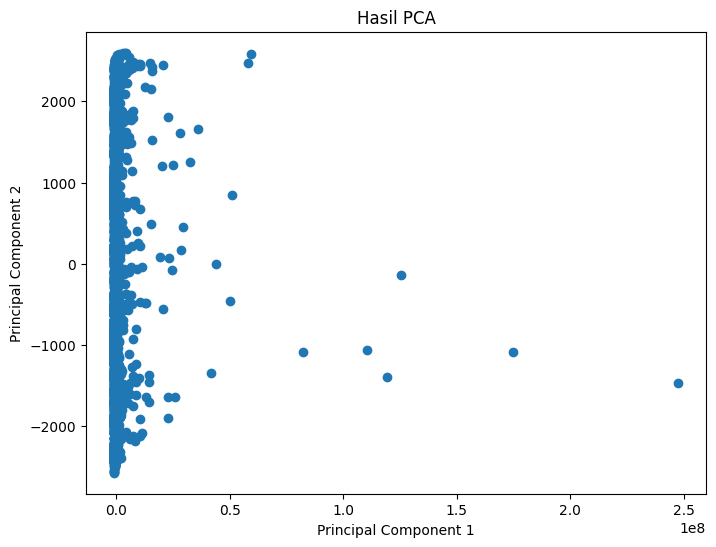

In [54]:
x = dataolahencoding
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

print(principalDf)

plt.figure(figsize=(8, 6))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Hasil PCA')
plt.show()


In [33]:
print(dataolahencoding)

        no  biaya_berobat  diagnosa_encod  institusi_encod  area_encod  \
0        1        1172500             404                5           1   
1        2         454000             409                2           6   
2        3          59000             409                3           6   
3        4          80500            1270                3           6   
4        5         586000             119                2           6   
...    ...            ...             ...              ...         ...   
4995  4996        4821801            1025                5           1   
4996  4997         131000             159                2           1   
4997  4998         401000             104                2           1   
4998  4999         131000              90                2           1   
4999  5000         150610             417                3           1   

      rumah_encod  tipe_encod  biaya_berobat_encod  
0              24           0                 2724  
1    

In [34]:
print(principalDf)

      principal component 1  principal component 2
0              2.466492e+05           -2416.623685
1             -4.718508e+05           -2465.327885
2             -8.668509e+05           -2571.227140
3             -8.453509e+05           -2564.365774
4             -3.398508e+05           -2445.548489
...                     ...                    ...
4995           3.895950e+06            2597.769432
4996          -7.948509e+05            2441.357471
4997          -5.248508e+05            2514.042351
4998          -7.948509e+05            2443.285454
4999          -7.752409e+05            2452.779730

[5000 rows x 2 columns]


In [35]:
from sklearn.cluster import KMeans

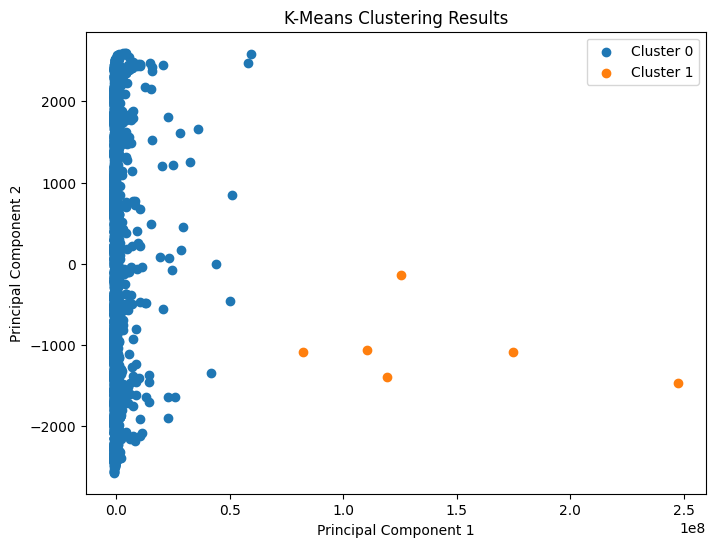

In [36]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(principalDf)
labels = kmeans.labels_
principalDf['cluster'] = labels

plt.figure(figsize=(8, 6))
for i in range(n_clusters):
  plt.scatter(principalDf[principalDf['cluster'] == i]['principal component 1'],
              principalDf[principalDf['cluster'] == i]['principal component 2'],
              label=f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()

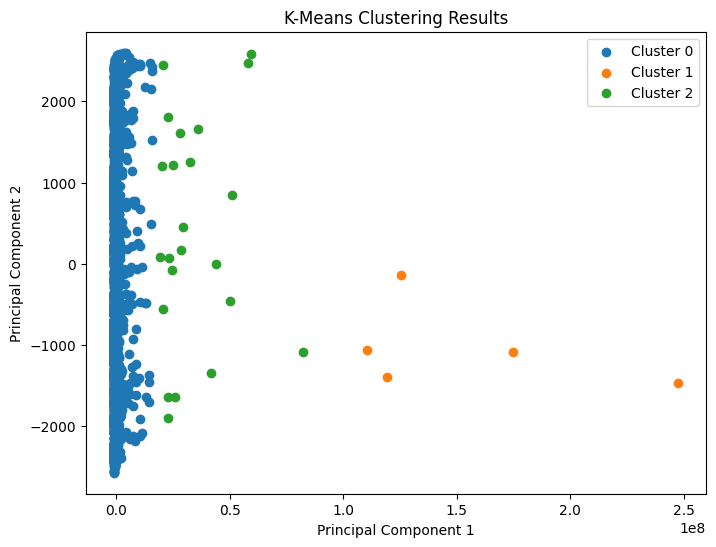

In [37]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(principalDf)
labels = kmeans.labels_
principalDf['cluster'] = labels

plt.figure(figsize=(8, 6))
for i in range(n_clusters):
  plt.scatter(principalDf[principalDf['cluster'] == i]['principal component 1'],
              principalDf[principalDf['cluster'] == i]['principal component 2'],
              label=f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()

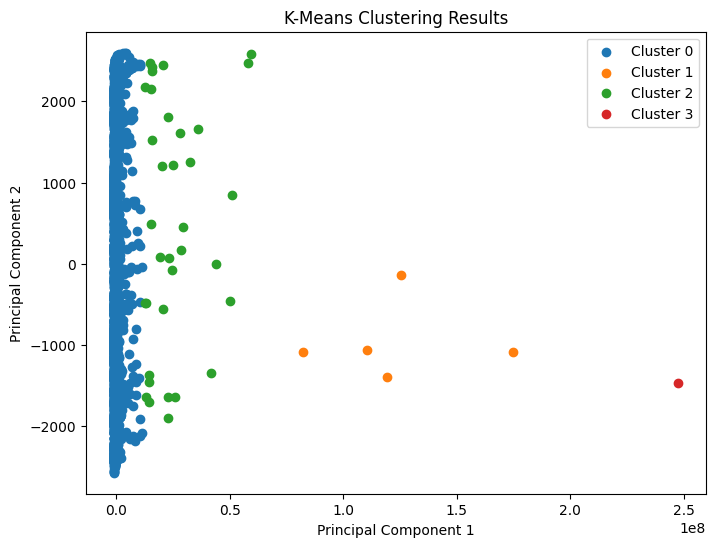

In [38]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(principalDf)
labels = kmeans.labels_
principalDf['cluster'] = labels

plt.figure(figsize=(8, 6))
for i in range(n_clusters):
  plt.scatter(principalDf[principalDf['cluster'] == i]['principal component 1'],
              principalDf[principalDf['cluster'] == i]['principal component 2'],
              label=f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 18602746970112.0000
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17515594907648.0000
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19167044435968.0000
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16827736391680.0000
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13098409787392.0000
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21790573199360.0000
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16820997193728.0000
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13504589332480.0000
Epoch 9/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 33461544943616.0000
Epoch 10/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 27323097153536.0000
Epoch 11/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11190605447168.0000
Epoch 12/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 30526438113280.0000
Epoch 13/100
157/157 ━━━━

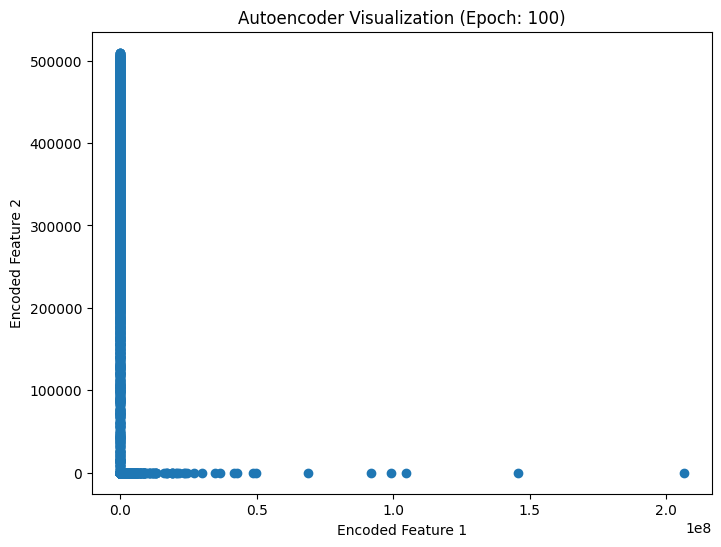

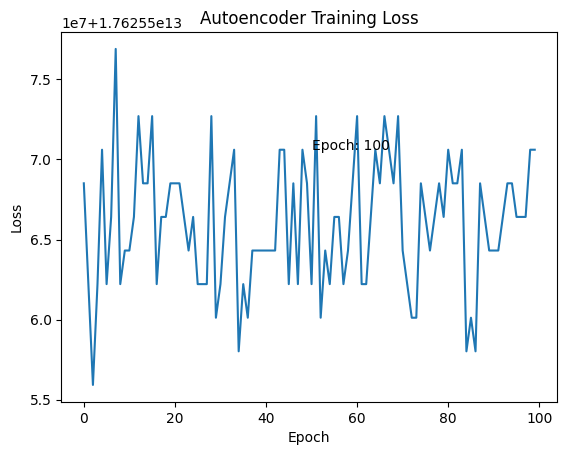

In [62]:
x = principalDf.values

# Define the autoencoder model
input_dim = x.shape[1]
encoding_dim = 2  # You can adjust this based on your desired dimensionality reduction

autoencoder = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(encoding_dim, activation='relu'),  # Encoder
    layers.Dense(input_dim, activation='sigmoid')  # Decoder
])

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
epochs = 100  # You can adjust the number of epochs
history = autoencoder.fit(x, x, epochs=epochs)

# Get the encoded representation
encoded_data = autoencoder.layers[0](x).numpy()

# Visualize the encoded data with epoch information
plt.figure(figsize=(8, 6))
plt.scatter(encoded_data[:, 0], encoded_data[:, 1])
plt.xlabel('Encoded Feature 1')
plt.ylabel('Encoded Feature 2')
plt.title(f'Autoencoder Visualization (Epoch: {epochs})')
plt.show()

# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Autoencoder Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.text(epochs/2, history.history['loss'][-1], f'Epoch: {epochs}')
plt.show()

Epoch 1/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.8466 - val_loss: 0.4792
Epoch 2/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4218 - val_loss: 0.3495
Epoch 3/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3372 - val_loss: 0.3207
Epoch 4/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3146 - val_loss: 0.3085
Epoch 5/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2996 - val_loss: 0.2871
Epoch 6/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2851 - val_loss: 0.2803
Epoch 7/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2887 - val_loss: 0.2722
Epoch 8/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2763 - val_loss: 0.2631
Epoch 9/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2549 - val_loss: 0.2674
Epoch 10/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2604 - val_loss: 0.2453
Epoch 11/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2358 - val_loss: 0.2372
Epoch 12/150
125/125 ━━━━━━━━━━━━━━━━━━━━

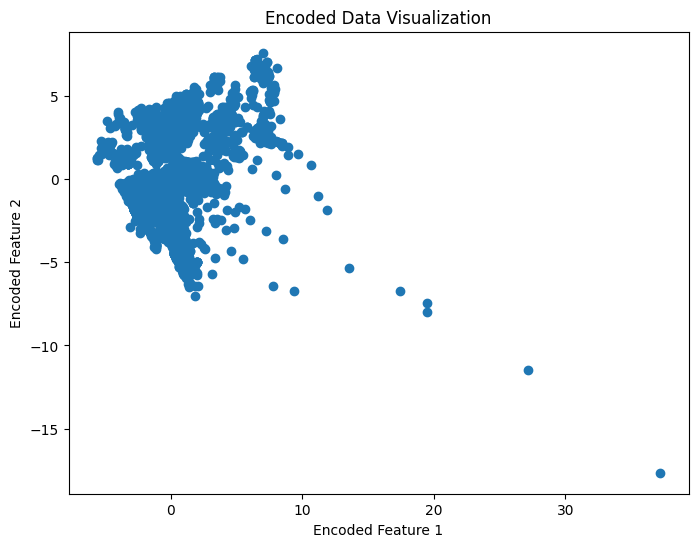

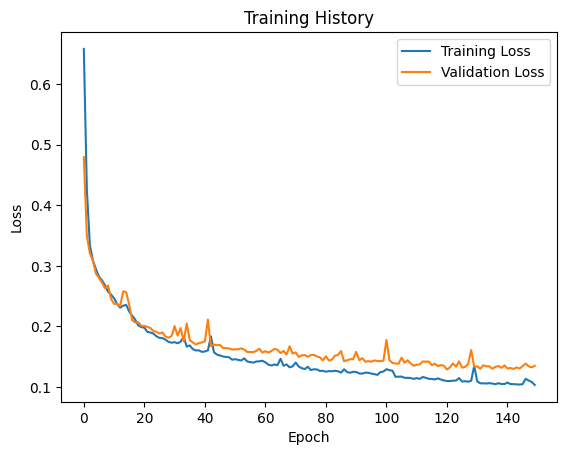

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Assuming your preprocessed data is in 'dataolahencoding' DataFrame
# Select numerical features for autoencoder
numerical_cols = dataolahencoding.select_dtypes(include=np.number).columns
data_for_autoencoder = dataolahencoding[numerical_cols]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_autoencoder)

# Split the data into training and testing sets
x_train, x_test = train_test_split(scaled_data, test_size=0.2, random_state=42)


# Define the autoencoder model
latent_dim = 2  # Dimension of the encoded representation

encoder_input = keras.Input(shape=(x_train.shape[1],))
encoded = layers.Dense(128, activation='relu')(encoder_input)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(latent_dim, activation='linear')(encoded)  # Linear activation for latent space

decoder_input = keras.Input(shape=(latent_dim,))
decoded = layers.Dense(64, activation='relu')(decoder_input)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(x_train.shape[1], activation='linear')(decoded)  # Linear activation for output

encoder = keras.Model(encoder_input, encoded, name="encoder")
decoder = keras.Model(decoder_input, decoded, name="decoder")
autoencoder = keras.Model(encoder_input, decoder(encoder(encoder_input)), name="autoencoder")

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
history = autoencoder.fit(x_train, x_train, epochs=150, batch_size=32, validation_data=(x_test, x_test))

# Encode the data
encoded_data = encoder.predict(scaled_data)


# Visualize the encoded data
plt.figure(figsize=(8, 6))
plt.scatter(encoded_data[:, 0], encoded_data[:, 1])
plt.xlabel('Encoded Feature 1')
plt.ylabel('Encoded Feature 2')
plt.title('Encoded Data Visualization')
plt.show()

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training History')
plt.legend()
plt.show()

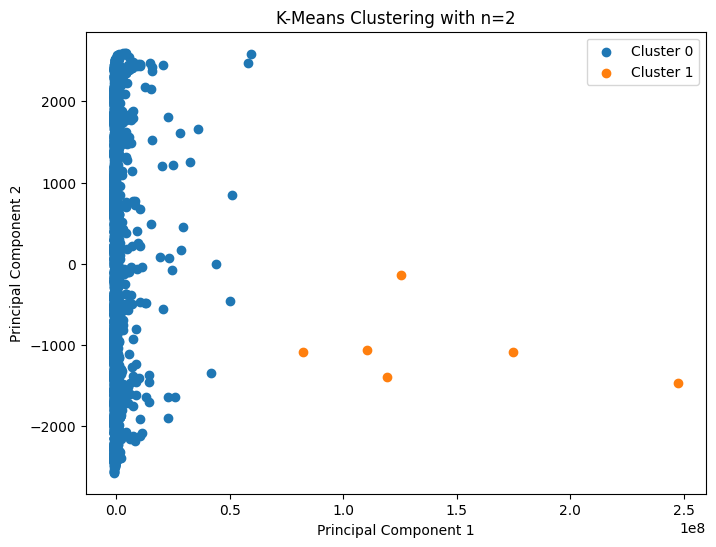

In [67]:
x = principalDf[['principal component 1', 'principal component 2']]

# Perform K-Means clustering with n=2
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(x)
labels = kmeans.labels_

# Add cluster labels to the DataFrame
principalDf['cluster'] = labels

# Visualize the clusters
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
  plt.scatter(principalDf[principalDf['cluster'] == i]['principal component 1'],
              principalDf[principalDf['cluster'] == i]['principal component 2'],
              label=f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'K-Means Clustering with n={n_clusters}')
plt.legend()
plt.show()


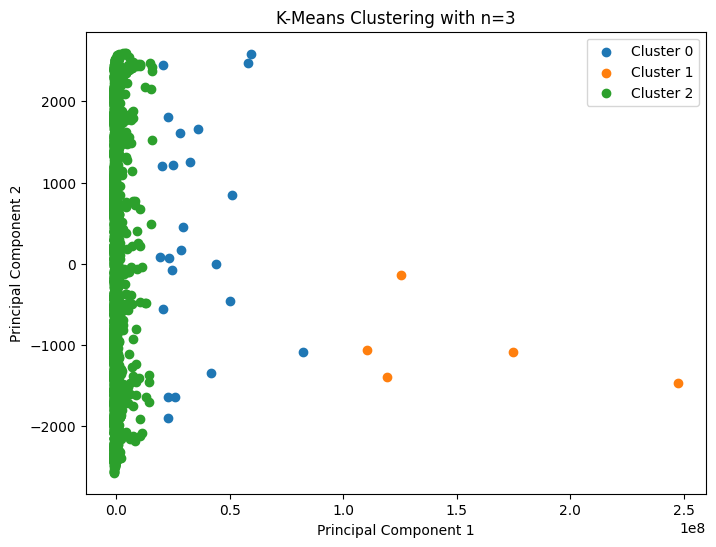

In [69]:
x = principalDf[['principal component 1', 'principal component 2']]

# Perform K-Means clustering with n=2
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(x)
labels = kmeans.labels_

# Add cluster labels to the DataFrame
principalDf['cluster'] = labels

# Visualize the clusters
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
  plt.scatter(principalDf[principalDf['cluster'] == i]['principal component 1'],
              principalDf[principalDf['cluster'] == i]['principal component 2'],
              label=f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'K-Means Clustering with n={n_clusters}')
plt.legend()
plt.show()

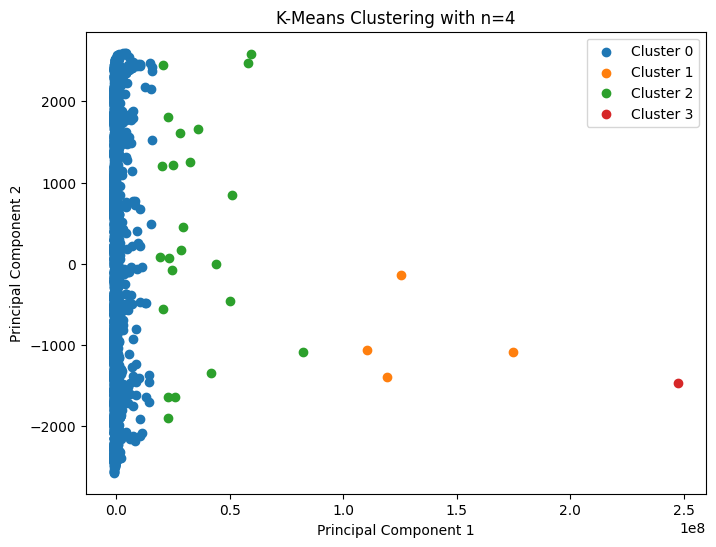

In [70]:
# prompt: dari hasil diatas ini lakukan clustering k mean dengan n = 2, berikan visualisasi scaterplotnya dengan informasi jumlah n

# ... (Your existing code) ...

# Assuming your PCA data is stored in principalDf
x = principalDf[['principal component 1', 'principal component 2']]

# Perform K-Means clustering with n=2
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(x)
labels = kmeans.labels_

# Add cluster labels to the DataFrame
principalDf['cluster'] = labels

# Visualize the clusters
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
  plt.scatter(principalDf[principalDf['cluster'] == i]['principal component 1'],
              principalDf[principalDf['cluster'] == i]['principal component 2'],
              label=f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'K-Means Clustering with n={n_clusters}')
plt.legend()
plt.show()

# ... (Rest of your code) ...

In [71]:
df_with_cluster = pd.concat([df, principalDf['cluster']], axis=1)

# Download the DataFrame as an Excel file
from google.colab import files

output_file_path = '/content/df_with_cluster.xlsx'
df_with_cluster.to_excel(output_file_path, index=False)
files.download(output_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>